In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, anderson, normaltest, kstest
import statistics as st

In [2]:
tempo_ligacao = [12.37,13,12.11,12.18,
11.55,12.26,12.34,12.41,
12.36,12.23,12.05,12.52,
12.59,12.48,12.19,12.57,
11.55,12.34,12.09,12.53,
12.38,12.58,12.3,12.29,
12.51,12.09,12.29,12.44,
12.01,13.02,12.13,12.57,
12.16,12.22,12.39,12.32,
12.4,12.38,12.17,12.15]


In [3]:
type(tempo_ligacao)

list

In [4]:
len(tempo_ligacao)


40

# Média, Mediana, Quartis, Variância e Desvio Padrão

A análise descritiva dos dados pode ser feita utilizando pandas (eu acho mais fácil pois existe um método chamado '.describe()'). 

Neste caso, é necessário transformar a lista em um DataFrame utilizando o construtor: 'pd.DataFrame(tempo_ligacao, columns=['tempo_ligacao'])'.



In [5]:
media = np.mean(tempo_ligacao)

print("Média:", media)

Média: 12.312999999999999


In [6]:
mediana = np.median(tempo_ligacao)

print("Mediana:", mediana)

Mediana: 12.33


In [7]:
variancia = np.var(tempo_ligacao)

print("Variância:", variancia)

Variância: 0.07714599999999994


In [8]:
desvio_padrao = np.std(tempo_ligacao)

print("Desvio Padrão:", desvio_padrao)

Desvio Padrão: 0.2777516876636395


In [9]:
st.quantiles(tempo_ligacao, n=4) #Usei a biblioteta Statistics pq é mais fácil, no numpy precisa descrever um por um. rs

[12.162500000000001, 12.33, 12.469999999999999]

# Assimetria

- **Resultado Próximo a Zero:**
  - Dados normalmente distribuídos.

- **Valor > 0:**
  - Assimetria positiva. A cauda da distribuição está mais para a direita.\
moda < mediana < média.

- **Valor < 0:**
  - Assimetria negativa. A cauda da distribuição está mais para a esquerda.\
média < mediana < moda.


In [10]:
#assimetria
stats.skew(tempo_ligacao)

-0.23264995406865138

# Curtose

- **Valor = 0:**
  - Distribuição mesocúrtica.

- **Valor > 0:**
  - Distribuição leptocúrtica (curva mais pontuda).

- **Valor < 0:**
  - Distribuição platicúrtica (curva mais achatada).

Quanto mais achatado, maior variabilidade dos dados.

In [11]:
stats.kurtosis(tempo_ligacao)


2.0419949296404107

# Plot com Gráfico Q-Q, Histograma, Box-Plot e Teste de Normalidade

In [12]:
def plotar_teste_normal(df, nome_df):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Plotar gráfico Q-Q
    stats.probplot(df, dist='norm', plot=ax1)
    ax1.set_title('Gráfico Q-Q')

    # Plotar histograma com densidade
    sns.histplot(df, ax=ax2, kde=True)
    ax2.set_title('Histograma com Densidade')

    # Plotar boxplot
    sns.boxplot(y=df, ax=ax3)
    ax3.set_title('Boxplot')

    # Adicionar o título com base no nome do DataFrame
    fig.suptitle(f"Análise Descritiva: {nome_df}", fontsize=16)

    plt.tight_layout()
    plt.show()

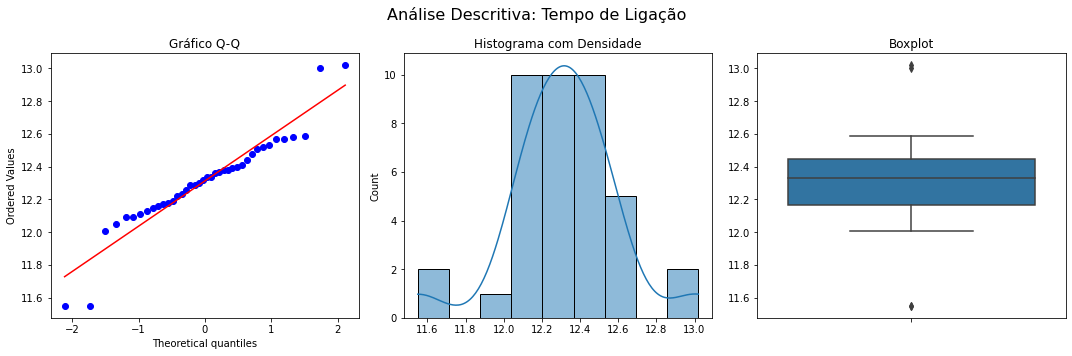

In [13]:
plotar_teste_normal(tempo_ligacao, "Tempo de Ligação")

O teste de Shapiro-Wilk é preferível a utilização em amostras pequenas (n > 50?), já o teste de D’Agostino-Pearson foi desenvolvido para lidar com amostras mais numerosas (n > 100).

# Teste de Normalidade

O teste de normalidade é importante na estatística para verificar se uma amostra de dados segue uma distribuição normal, pois irá direcionar o melhor método estatístico para análise. Os principais tipos de teste de normalidade incluem o teste de Shapiro-Wilk, D’Agostino-Pearson e Kolmogorov-Smirnov.

O teste de Shapiro-Wilk é preferido para amostras pequenas, enquanto D'Agostino-Pearson é útil para amostras maiores e mais complexas (n > 100). O teste de Kolmogorov-Smirnov é uma opção geral para verificar a adequação a qualquer distribuição teórica.

In [14]:
# Teste de Shapiro-Wilk
stat_shapiro, p_valor_shapiro = shapiro(tempo_ligacao)
print(f'Teste de Shapiro-Wilk: Estatística = {stat_shapiro}, P-valor = {p_valor_shapiro}')

Teste de Shapiro-Wilk: Estatística = 0.9223750829696655, P-valor = 0.00915326178073883


In [15]:
# Teste de D’Agostino-Pearson
stat_dagostino, p_valor_dagostino = normaltest(tempo_ligacao)
print(f'Teste de D’Agostino-Pearson: Estatística = {stat_dagostino}, P-valor = {p_valor_dagostino}')

Teste de D’Agostino-Pearson: Estatística = 5.902427783890157, P-valor = 0.05227620974753422


In [16]:
# Teste de Kolmogorov-Smirnov
stat_ks, p_valor_ks = kstest(tempo_ligacao, 'norm')
print(f'Teste de Kolmogorov-Smirnov: Estatística = {stat_ks}, P-valor = {p_valor_ks}')

Teste de Kolmogorov-Smirnov: Estatística = 1.0, P-valor = 0.0


## Decisão Estatística:

- **Se** valor < Nível de Significância:\
  **Rejeitar H0:** Conclui-se que os dados não seguem uma distribuição normal.
  

- **Se** valor > Nível de Significância:\
  **Não Rejeitar H0:** Não há evidência suficiente para concluir que os dados não seguem uma distribuição normal.


Dado que temos uma amostra com n = 40, o método estatístico mais apropriado é o teste de Shapiro-Wilk. A rejeição da hipótese nula sugere que os dados não seguem uma distribuição normal.